In [59]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [60]:
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

In [61]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

# churn customers

In [62]:
df['Last_Transaction'].max()

Timestamp('2019-02-01 23:57:57.286000128')

In [63]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [64]:
df[df['is_churn'] == True].head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
10,11,11,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True
11,12,12,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True
14,15,15,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True
25,26,26,40931,Sepatu,2016-01-29 07:26:35.066999808,2018-05-25 11:53:37.568000000,3473946,25,True
32,33,33,91757,Sepatu,2016-08-15 05:03:03.959000064,2017-05-08 07:20:47.756999936,918079,32,True


# menghapus kolom yang tidak dibutuhkan

In [65]:
# del df['no']
# del df['Row_Num']

df.drop(columns=['no', 'Row_Num'], inplace=True)
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


# Customer acquisition by year

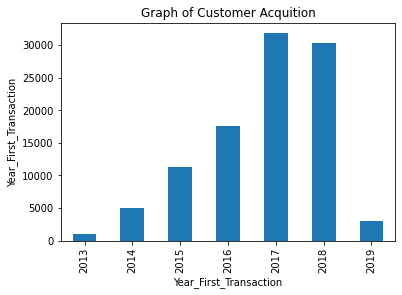

In [66]:
import matplotlib.pyplot as plt
# membuat feature baru
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

# group
df_year = df.groupby('Year_First_Transaction')['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Year_First_Transaction')
plt.show()

# Transaction by year

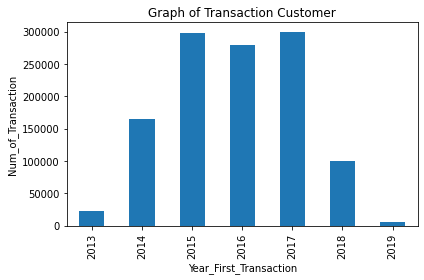

In [67]:
df_transaction = df.groupby('Year_First_Transaction')['Count_Transaction'].sum()
df_transaction.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

# Average transaction amount by year

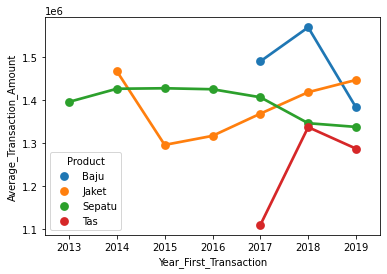

In [68]:
import seaborn as sns

df_product = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index()
sns.pointplot(data=df_product, x='Year_First_Transaction', y='Average_Transaction_Amount', hue='Product')
plt.show()

In [69]:
df_product

,Product,Year_First_Transaction,Customer_ID,Average_Transaction_Amount,Count_Transaction,Year_Last_Transaction
0,Baju,2017,99973.327529,1.490890e+06,3.157546,2017.151741
1,Baju,2018,188857.666496,1.570201e+06,2.175475,2018.026167
2,Baju,2019,281390.361868,1.383645e+06,1.871595,2019.000000
3,Jaket,2014,30906.745455,1.467937e+06,22.747727,2015.827273
4,Jaket,2015,43482.506832,1.296265e+06,21.789130,2016.603106
5,Jaket,2016,76570.356631,1.317344e+06,11.341306,2016.681180
6,Jaket,2017,138036.387196,1.369034e+06,6.292709,2017.265146
7,Jaket,2018,374795.205008,1.419074e+06,2.830617,2018.034700
8,Jaket,2019,542531.441905,1.447536e+06,1.999048,2019.000000
9,Sepatu,2013,7534.270109,1.396499e+06,22.993049,2014.892751


# Proporsi churned customer untuk setiap produk

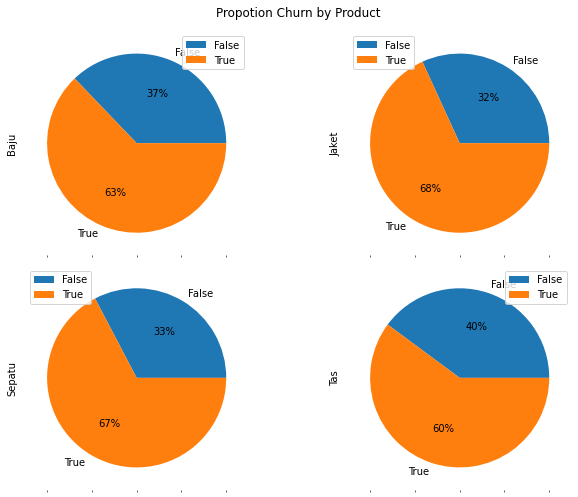

In [70]:
# pivot_table
df_piv = df.pivot_table(index='is_churn',
               columns='Product',
               values='Customer_ID',
               aggfunc='count',
               fill_value=0)

plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# plot pie chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10,7),
                layout=(-1,2),
                autopct='%1.0f%%',
                title='Propotion Churn by Product')
plt.tight_layout()
plt.show()

# Distribusi kategorisasi count transaction

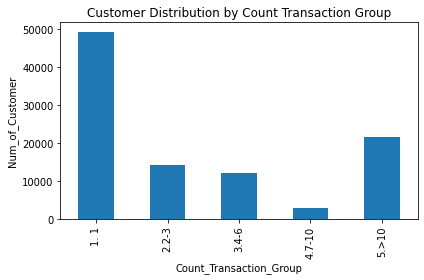

In [71]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Distribusi kategorisasi average transaction amount

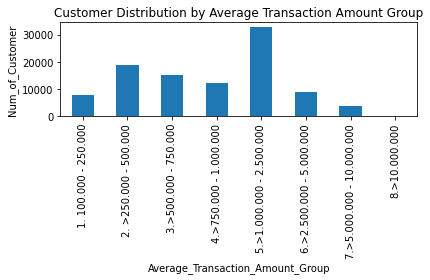

In [72]:
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000) and row['Average_Transaction_Amount'] <= 500000:
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3.>500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4.>750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5.>1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6.>2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7.>5.000.000 - 10.000.000'
    else:
        val = '8.>10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()


# Feature Columns dan Target

In [73]:
import pandas as pd
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

# Split X dan y ke dalam bagian training dan testing

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train, predict dan evaluate

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

# Visualisasi Confusion Matrix

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Accuracy, Precision, dan Recall

In [ ]:
from sklearn.metrics import accuracy_score, Precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', Precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))